<a href="https://colab.research.google.com/github/zar55/COSC_640_Intro_to_AI/blob/Lab/Lab_07_zziauddin1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COSC-640: Lab 7

**Zargham Ziauddin**

[PLACEHOLDER_FOR_NOTEBOOK_LINK]


## Getting Started

Follow the instructions below to copy this notebook and to perform some initial setup.

1. Copy this notebook by selecting `File > Save a copy in Drive`.
2. A new window should open for the copied notebook. Move the new notebook to your course folder in Google Drive by selecting `File > Move` and then selecting the desired folder.
3. Update the name of the notebook by removing "Copy of" and replacing "Username" with your actual username.
4. Update the first cell in the notebook by specifying your course number (440 or 640) and by replacing "**Student Name**" with your actual name.
5. Do not edit the line that says `PLACEHOLDER_FOR_NOTEBOOK_LINK`. This will be used by the [Notebook Renderer](https://colab.research.google.com/drive/1CJTipys46ldZxJFwnt7XbdjQUfkmoXeU?usp=sharing) tool to insert a link to your Colab notebook.
6. Enable link sharing for your notebook.

## Preparing the Colab Environment

Run the cell below to download the `aitools` course package.

In [ ]:
%%capture
!rm aitools -r
!git clone https://github.com/drbeane/aitools.git

Run the cells below to import the necessary tools for this assignment. No other import statements are required for this lab, and no other import statements should be included in this assignment.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

from aitools.algs import DPAgent, MCAgent
from aitools.envs import FrozenPlatform

# Part 1: Comparing Policies

In Part 1, you will compare the performance of two different policies. You will also use dynamic programming methods to evaluate each policy.

##1.A - Create Environment

An instance of the `FrozenPlatform` environment has been provided for you in this cell. Call the `display()` method of this instance with `fill='slip'` and `contents='slip'` to display the environment with the slip probabilities for each state.

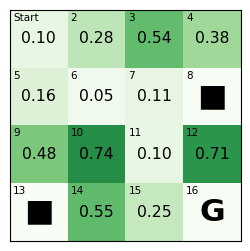

In [ ]:
fp1 = FrozenPlatform(4, 4, [0, 0.8], start=1, holes=[8, 13], random_state=391)
# Display the environment
fp1.display(fill='slip', contents='slip')

## 1.B - Display Policies

Run the cell below as-is. This will define two policies, `pi1` and `pi2` and will provide a graphical display of both policies. Note that the two policies differ only in the action taken from State 6.

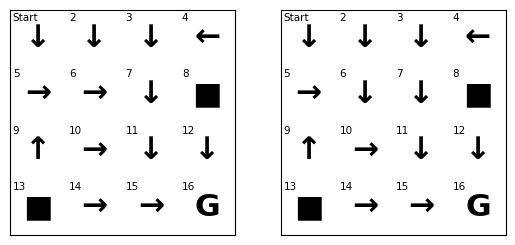

In [ ]:
pi1 = {0:0, 1:2, 2:2, 3:2, 4:3, 5:1, 6:1, 7:2, 8:0, 9:0, 10:1, 11:2, 12:2, 13:0, 14:1, 15:1, 16:0}
pi2 = {0:0, 1:2, 2:2, 3:2, 4:3, 5:1, 6:2, 7:2, 8:0, 9:0, 10:1, 11:2, 12:2, 13:0, 14:1, 15:1, 16:0}

plt.subplot(1,2,1)
fp1.display(contents=pi1, fill=None, show_fig=False)
plt.subplot(1,2,2)
fp1.display(contents=pi2, fill=None, show_fig=False)
plt.show()

## 1.C - Policy Evaluation

You will now evaluate the two policies from Step 1.B.

Create two instances of the `DPAgent` class, each using the environment created in Step 1.A, and each with `gamma=1`. One of the agents should be set to have policy `pi1` and the other should have policy `pi2`. Run policy evaluation for both agents to evaluate the two policies.

Then display a 1x2 grid of subplots. Each subplot should show a display of the environment along with a policy. The first subplot should display `pi1` and have cells shaded according to the value function for `pi1`. The second plot should be similar, but should use policy `pi2` and its value function.

Note: You can copy the code for the subplots from 1.B, adjusting the arguments used for the `fill` and `contents` parameters.

Policy evaluation required 24 iterations.
Policy evaluation required 37 iterations.


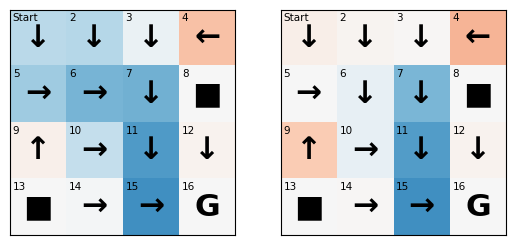

In [ ]:
dp1 = DPAgent(env=fp1, gamma=1, policy=pi1)
dp2 = DPAgent(env=fp1, gamma=1, policy=pi2)

dp1.evaluate_policy()
dp2.evaluate_policy()

plt.subplot(1,2,1)
fp1.display(contents=pi1, fill=dp1.V, show_fig=False)
plt.subplot(1,2,2)
fp1.display(contents=pi2, fill=dp2.V, show_fig=False)
plt.show()

## 1.D - Value of Initial State

Print the value of State 1 (the initial state) under each policy.

In [ ]:
print(f"Initial State of DP1: {dp1.V[0]}")
print(f"Initial State of DP2: {dp2.V[0]}")

Initial State of DP1: 0.0
Initial State of DP2: 0.0


## 1.E - Success Rates

You will now estimate the agent's success rate when following each policy. This will be accomplished by generating 10,000 episodes according to each policy and then calculating the proportion of episodes that where sucessful.

Fill in the blanks in order to accomplish the requested task. Then print the two messages shown below, with the blanks filled in with the appropriate success rates, rounded to 4 decimal places. Aside from filling in the blanks, do not change any code provided.

    Under policy 1, the agent's success rate was ____.
    Under policy 2, the agent's success rate was ____.

In [ ]:
N = 10000
goals1 = 0
goals2 = 0

np.random.seed(1)
for i in range(N):

    ep1 = fp1.generate_episode(policy=pi1)
    ep2 = fp1.generate_episode(policy=pi2)

    if ep1.state == ep1.goal:
        goals1 += 1

    if ep2.state == ep2.goal:
        goals2 += 1

sr1 = goals1/N
sr2 = goals2/N

print(f"Under policy 1, the agent's success rate was {sr1:.4f}.")
print(f"Under policy 2, the agent's success rate was {sr2:.4f}.")

Under policy 1, the agent's success rate was 0.6903.
Under policy 2, the agent's success rate was 0.4986.


# Part 2: Policy Iteration

In Part 2, you will be applying policy iteration to a Frozen Platform environment to find the optimal policy, and will then analyze the performance of the resulting policy.

## 2.A - Create Environment

Create a 5x5 instance of the `FrozenPlatform` environment with `sp_range=[0.1, 0.3]`, `start=1`, `holes=3`, and with `random_state=1`. Display this environment with the cells shaded to indicate their slip probabilities and with the cell contents left blank.

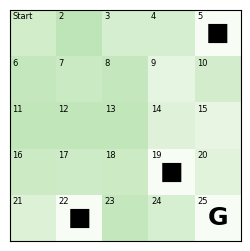

In [ ]:
fp2 = FrozenPlatform(rows=5, cols=5, sp_range=[.1, .3], start=1, holes=3, random_state=1)

fp2.display(fill='slip', contents=None)

## 2.B - Random Actions

You will now estimate the agent's success rate when taking random actions. We will compare this with the success rate of a trained again later.

Fill in the blanks in this cell to accomplish this task. Then print the message shown below, with the blank filled in with the appropriate success rate rounded to 4 decimal places.

    When acting randomly, the agent's success rate was ____.

In [ ]:
N = 10000
goals = 0

np.random.seed(1)

for i in range(N):
    ep = fp2.copy()

    while ep.terminal == False:
        a = np.random.choice(ep.get_actions())
        ep = ep.take_action(a)

    if ep.state == ep.goal:
        goals += 1

sr = goals/N

print(f"When acting randomly, the agent's sucess rate was {sr:.4f}")

When acting randomly, the agent's sucess rate was 0.0022


## 2.C - Policy Iteration

Create an instance of the `DPAgent` class for the environment created in Step 2.A, with `gamma=1` and `random_state=1`. Run policy iteration with the default parameters.

Then call the `show_history()` method of the `DPAgent` instance to display a sequence of plots showing the policy and value function after each step of policy iteration.

Finally, call the `report()` method of the agent to show a summary of each step of policy iteration.

Policy Iteration took 5 steps and 138 evaluation sweeps to converge.
Total time required was 0.03 seconds.


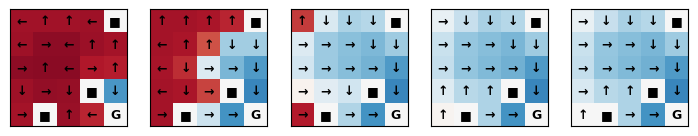

Update 1 - 18 state/action pairs changed
Update 2 - 11 state/action pairs changed
Update 3 - 5 state/action pairs changed
Update 4 - 1 state/action pairs changed
Update 5 - 0 state/action pairs changed


In [ ]:
dp3 = DPAgent(env=fp2, gamma=1, random_state=1)

dp3.policy_iteration()

dp3.show_history()

dp3.report()

## 2.D - Value of Initial State

Print the value of State 1 (the initial state) under the optimal policy.

In [ ]:
print(f"Initial State of DP3: {dp3.V[0]}")

Initial State of DP3: 0.0


## 2.E - Success Rates

You will now estimate the agent's success rate when following the optimal policy. This will be accomplished by generating 10,000 episodes according to each policy and then calculating the proportion of episodes that where sucessful.

Fill in the blanks in order to accomplish the requested task. Then print the three messages shown below, with the blanks filled in with the appropriate values, rounded to 4 decimal places. Aside from filling in the blanks, do not change any code provided.

    When working under the optimal policy:
    The agent's success rate was ____.
    The agent's average return was ____.


In [ ]:
# 2.E

N = 10000

goals = 0
total_return = 0

np.random.seed(1)
for i in tqdm(range(N)):

    ep = fp2.generate_episode(policy=dp3.policy)

    total_return += np.sum(ep.rewards)

    if ep.state == ep.goal:
        goals += 1

sr = goals/N
avg_ret = total_return/N

print('\n\nWhen working under the optimal policy:')
print(f"The agent's success rate was {sr:.4f}.")
print(f"The agent's average return was {avg_ret:.4f}.")

100%|██████████| 10000/10000 [00:07<00:00, 1369.31it/s]



When working under the optimal policy:
The agent's success rate was 0.5841.
The agent's average return was 10.2240.


## 2.F - Successful Episode

Use the `generate_episode()` method of the environment to simulate an episode following the optimal policy found by policy iteration. Set `show_result=True` and set a value of your choice for `random_state`.

Call the `display()` method of the enviornment, setting the `fill`, `contents`, and `show_path` parameters sp that cells are shaded to indicate the optimal state-value function, arrows for the the optimal policy are displayed, and the path taken during the episode is shown.

Experiment with the value of `random_state` to find one that results in the agent finding the goal. Use that value for your final submission.

The agent reached the goal!


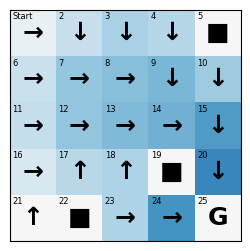

In [ ]:
fp2.generate_episode(policy=dp3.policy, show_result=True, random_state=1)

fp2.display(contents=dp3.policy, fill=dp3.V, show_path=True)

## 2.G - Failed Episode

Repeat Step 2.F, but this time find a value for `random_state` that results in a failed episode with at least 4 steps.

The agent failed to reach the goal.


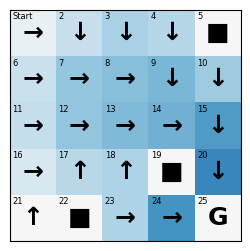

In [ ]:
fp2.generate_episode(policy=dp3.policy, show_result=True, random_state=125)

fp2.display(contents=dp3.policy, fill=dp3.V, show_path=True)

# Part 3: Policy Iteration vs Value Iteration

In Part 3, you will compare the convergence time of policy iteration and value iteration. Both techniques are guaranteed to converge to the optimal policy in a finite number of steps, but we will see that the number of steps required can be considerably different.

## 3.A - Create Environment

Create a 30x30 instance of the `FrozenPlatform` environment with `sp_range=[0, 0.2]`, a start position of 1 (which is the default), no holes, and with `random_state=1`. You do not need to display the environment.

In [ ]:
fp3 = FrozenPlatform(rows=30, cols=30, sp_range=[0, .2], start=1, holes=0, random_state=1)

## 3.B - Policy Iteration

Create an instance of the `DPAgent` class for the environment created in Step 3.A. Set `gamma=1` and `random_state=1`. Run **policy iteration** with the default parameters.

In [ ]:
dp4 = DPAgent(env=fp3, gamma=1, random_state=1)

dp4.policy_iteration()

Policy Iteration took 18 steps and 11873 evaluation sweeps to converge.
Total time required was 60.25 seconds.


## 3.C - Value Iteration

Create annother instance of the `DPAgent` class for the environment created in Step 3.A. Set `gamma=1` and `random_state=1`. Run **value iteration** with the default parameters.

In [ ]:
dp5 = DPAgent(env=fp3, gamma=1, random_state=1)

dp5.value_iteration()

Value Iteration took 78 steps to converge.
Total time required was 1.94 seconds.


## 3.D - Algorithm Comparison

In the previous steps, you should have noticed that policy iteration had a considerably longer runtime than value iteration. You will now explore how these runtimes depend on environment size.

Starter code has been provided to you for this step. The code is intended to use a loop to create `FrozenPlatform` environments of size 2x2, 3x3, 4x4, and so on up to 25x25. Both policy iteration and value iteration will be applied to each environment. The `time()` function from the `time` module will be used to calculate the runtime for each algorithm, storing the results in two different lists.

After the loop is complete, the cell should output the following two messages, with the blanks filled in with the appropriate values, rounded to 4 decimal places.

    Average time for policy iteration: ____
    Average time for value iteration: ____


In [ ]:
%%time
# 3.D
rng = range(2,26)
pol_iter_times = []
val_iter_times = []

#np.random.seed(1)
for i in tqdm(rng):
    temp_fp = FrozenPlatform(rows=i, cols=i, sp_range=[0.1, 0.4], holes=0, random_state=i)

    t0 = time.time()
    temp_dp = DPAgent(env=temp_fp, gamma=1, random_state=i)
    temp_dp.policy_iteration(report=False)
    delta_t = time.time() - t0
    pol_iter_times.append(delta_t)

    t0 = time.time()
    temp_dp = DPAgent(env=temp_fp, gamma=1, random_state=i)
    temp_dp.value_iteration(report=False)
    delta_t = time.time() - t0
    val_iter_times.append(delta_t)

print(f'\nAverage time for policy iteration: {np.mean(pol_iter_times):.4f}')
print(f'Average time for value iteration: {np.mean(val_iter_times):.4f}')

100%|██████████| 24/24 [00:56<00:00,  2.37s/it]


Average time for policy iteration: 1.9084
Average time for value iteration: 0.4452
CPU times: user 55.7 s, sys: 160 ms, total: 55.8 s
Wall time: 56.9 s


## 3.E - Visualizing Results

Use Matplotlib to create a figure with two line plots on a single axis. The y-values for each line plot should come from the runtime lists created in the previous cell. The x-values should be the associated environment sizes (2 through 25). Create the figure according to the following specifications.

* Set the `figsize` to `[6,3]`.
* The title should read "Runtime Comparison".
* The `x` and `y` axes should be labeled "Environment Size" and "Runtime (in seconds)", respectively.
* Add a legend with labels "Policy Iteration" and "Value Iteration" to explain which line corresponds to which algorithm.
* Add a grid to your plot.

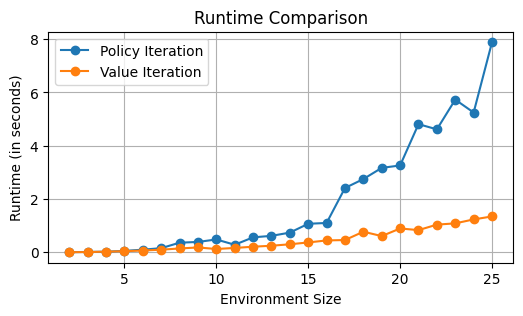

In [ ]:
plt.figure(figsize=[6, 3])
plt.plot(rng, pol_iter_times, label='Policy Iteration', marker='o')
plt.plot(rng, val_iter_times, label='Value Iteration', marker='o')

# Add title and labels
plt.title('Runtime Comparison')
plt.xlabel('Environment Size')
plt.ylabel('Runtime (in seconds)')

# Add legend
plt.legend()

# Add grid
plt.grid(True)

# Show the plot
plt.show()

# Part 4: Average Path Length

In Part 4, you will apply value iteration to a relatively large Frozen Platform environment and will then study the average path length for successful and unsuccessful episodes run under the optimal policy.

## 4.A - Create Environment

Create a 12x24 instance of the `FrozenPlatform` environment with `sp_range=[0.1, 0.4]`, a start position of 27, with 25 holes, and with `random_state=1`. Display the environment with cells, set `fill` to shade the cells according to their slip probabilities, set `size=3`, and set `show_nums=False`.

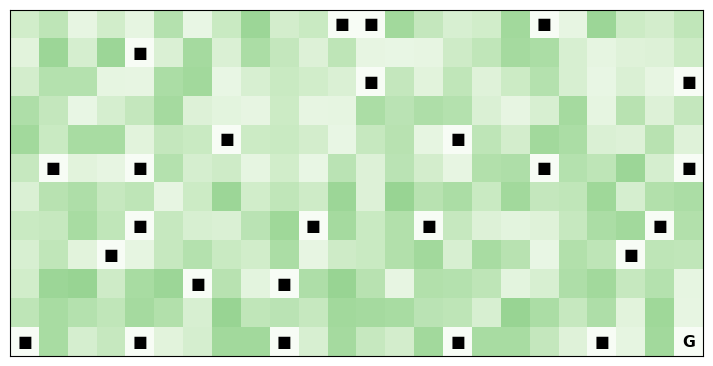

In [ ]:
fp4 = FrozenPlatform(rows=12, cols=24, sp_range=[.1, .4], start=27, holes=25, random_state=1)

fp4.display(fill='slip', size=3, show_nums=False)

## 4.B - Value Iteration
Create an instance of the `DPAgent` class for the environment created in Step 4.A, with `gamma=1` and `random_state=1`. Run value iteration with the default parameters.

Display the environment again, this time set `fill` to shade the cells accoprding to the state-value function for the optimal policy, set `contents` to display the optimal policy, set `size=3`, and set `show_nums=False`.

Value Iteration took 85 steps to converge.
Total time required was 1.55 seconds.


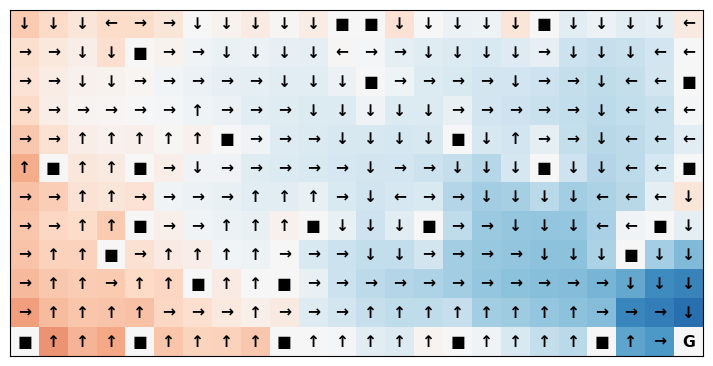

In [ ]:
dp6 = DPAgent(env=fp4, gamma=1, random_state=1)

dp6.value_iteration()

fp4.display(fill=dp6.V, contents=dp6.policy, size=3, show_nums=False)

## 4.C - Average Performance

You will now study the average performance of an agent following the optimal policy found in 4.B. You will estimate the agent's success rate, and will also determine the average path length for successful episodes as well as for unsuccessful episodes.

Starter code has been provided below. Fill in the blanks as required to accomplish the tasks described below.

The code should generate 10,000 episodes following the optimal policy. After each episode, determine if the agent reached the goal. If so, increment the goal count and append the length of the resulting path to the list `s_lengths`. If the agent did not reach the goal, then append the path length to the list `f_lengths`.

Then print messages regarding the success rate under the optimal policy, as well as the average path length for both successful and failed episodes.


In [ ]:
N = 10000
s_lengths = []
f_lengths = []
goals = 0

np.random.seed(1)
for i in range(N):

    ep = fp4.generate_episode(policy=dp6.policy)
    path_length = i

    if ep.state == ep.goal:
        goals += 1
        s_lengths.append(path_length)

    else:
        f_lengths.append(path_length)

sr = goals/N

print('When working under the optimal policy:')
print(f"The agent's success rate was {sr:.4f}.")
print(f'The average path length for successful episodes was {np.mean(s_lengths):.1f}.')
print(f'The average path length for unsuccessful episodes was {np.mean(f_lengths):.1f}.')

When working under the optimal policy:
The agent's success rate was 0.6850.
The average path length for successful episodes was 4959.5.
The average path length for unsuccessful episodes was 5086.4.


## 4.D - Visualizing Results

Use Matplotlib to create a 1x2 grid of subplots. Each subplot should contain a histogram indicating the distribution of path lengths. One histogram should correspond to path lengths for successful episodes and the other to unsuccessful episodes. The figure should have the following characteristics:

* Set the figure size to be `[8,3]`.
* The subplots should be titled "Successful Episodes" and "Unsuccessful Episodes".
* The x-axis of each subplot should be labeled "Path Length" and the y-axis should be labeled "Episode Count".
* Use 20 bins for each histogram.
* Select a different color for each subplot. Set the edgecolor of the bars to `'black'` or `'k'`.
* Set the `xlim` to be the same for both subplots. Select values that result in no bars getting cut off.
* Set the `ylim` to be the same for both subplots. Select values that result in no bars getting cut off.

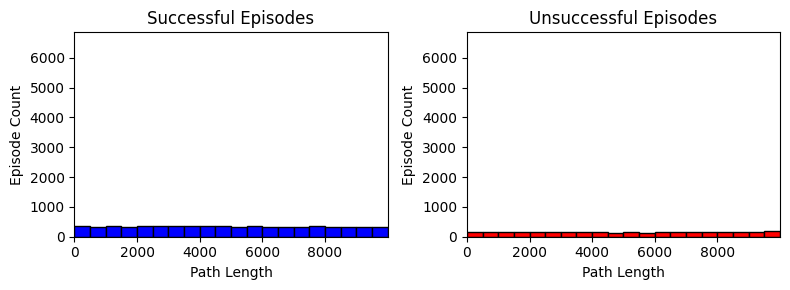

In [ ]:
# Set figure size
plt.figure(figsize=[8, 3])

# Subplot 1: Successful Episodes
plt.subplot(1, 2, 1)
plt.hist(s_lengths, bins=20, color='blue', edgecolor='black')
plt.title('Successful Episodes')
plt.xlabel('Path Length')
plt.ylabel('Episode Count')
plt.xlim(0, max(s_lengths))  # Adjust xlim based on your data
plt.ylim([0, max(len(s_lengths), len(f_lengths))])  # Adjust ylim based on your data

# Subplot 2: Unsuccessful Episodes
plt.subplot(1, 2, 2)
plt.hist(f_lengths, bins=20, color='red', edgecolor='black')
plt.title('Unsuccessful Episodes')
plt.xlabel('Path Length')
plt.ylabel('Episode Count')
plt.xlim(0, max(f_lengths))  # Adjust xlim based on your data
plt.ylim([0, max(len(s_lengths), len(f_lengths))])  # Adjust ylim based on your data

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

## 4.E - Successful Episode

Use the `generate_episode()` method of the environment to simulate an episode following the optimal policy in found by value iteration in 4.B. Set `show_result=True` and set a value of your choice for `random_state`.  

Call the `display()` method of the enviornment, setting the `fill`, `contents`, and `show_path` parameters sp that cells are shaded to indicate the optimal state-value function, arrows for the the optimal policy are displayed, and the path taken during the episode is shown.

Experiment with the value of `random_state` to find one that results in the agent finding the goal. Use that value for your final submission.

The agent reached the goal!


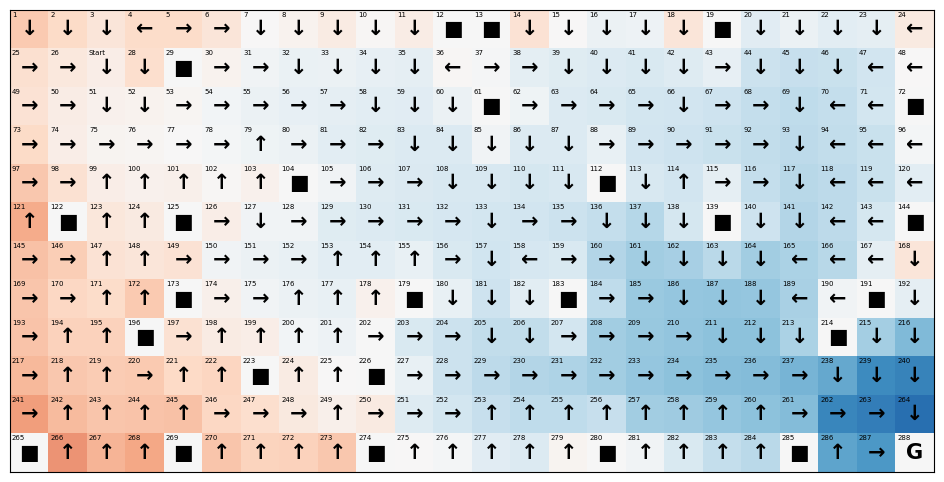

In [ ]:
fp4.generate_episode(policy=dp6.policy, show_result=True, random_state=1) #
fp4.display(fill=dp6.V, contents=dp6.policy, show_path=True, size=4) #

## 4.F - Failed Episode

Repeat Step 4.E, but this time find a value for `random_state` that results in a failed episode.

The agent failed to reach the goal.


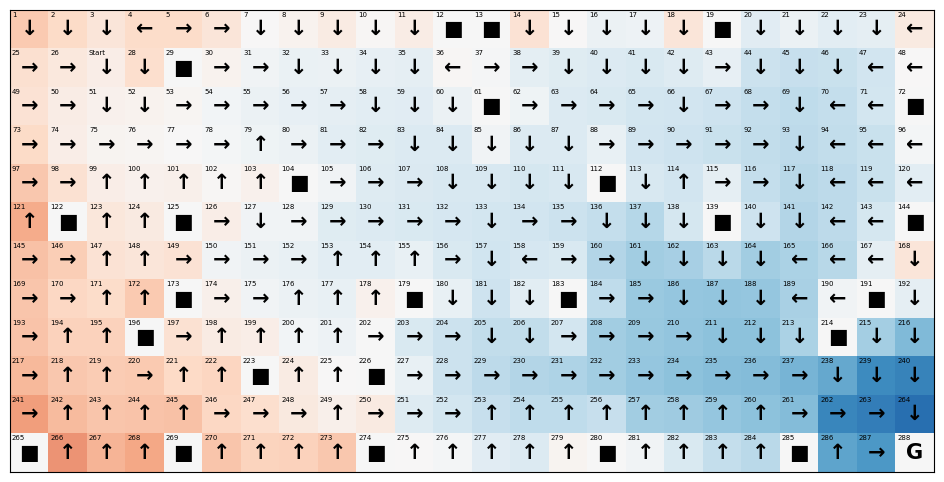

In [ ]:
fp4.generate_episode(policy=dp6.policy, show_result=True, random_state=70) #
fp4.display(fill=dp6.V, contents=dp6.policy, show_path=True, size=4) #

# Submission Instructions

1. Perform a Restart and Run All by clicking **Tools > Restart session and run all**.
2. Copy the link to your notebook by clicking **Share > Copy Link**.
3. Paste the copied link into the `notebook_url` field in the [Notebook Renderer](https://colab.research.google.com/drive/1CJTipys46ldZxJFwnt7XbdjQUfkmoXeU?usp=sharing) tool and then execute the cell to render the notebook.
4. The Notebook Renderer will open up a save file dialog. Save the resulting HTML file yo your local machine.
5. Submit the HTML file to Canvas.
